# **Imports**

In [1]:
import numpy as np                 # For numerical calculations and storing data in arrays
import matplotlib.pyplot as plt    # For data visualization 
import scipy.stats as stats        # For stats calculations
import scipy.special as special    # For summing probabilities that you're storing as log probabilities.
import seaborn as sns              # For more enhanced data visualization   
import pandas as pd                # For data exploration, data extraction, data manipulation, and data storage

# To get inline static figures from matplotlib in a Jupyter Notebook page
%matplotlib inline

### *Explanation*
The `numpy` module will be used for doing numerical calculations and for storing important data in arrays.

The `pandas` module will be used for exploring the data, for storing the data in dataframes, and making any necessary changes in the data format so that it is "tidy" and modular for visualization and analysis.  

The `matplotlib` module will be used to visualize data and interpret results.
The `seaborn` module will offer more options for better data visualization. 

The `scipy.stats` and `scipy.special` modules will be used for the `stats.norm.logpdf()` function for the Gaussian log PDF, and `special.logsumexp()` for summing probabilities that we are storing as log probabilities.

# **1. The beginner's game**

## **a) Funtion that calculates the posterior probability $P(\mu|{x}_{1}...{x}_{n},\sigma)$ for each of the 21 possible values of $\mu$ on that grid row**

In [2]:
def calc_posterior(mu_list, x_obs, sigma):
    """
    This function takes a list of mu values, n observations x1...xn, and one of the 20 possible values of sigma (i.e. a known row, specified by Student) as input; 
    then calculates the posterior probability for each of the 21 possible values of mu on that grid row as an output.
    
    Input: <mu_list> (list): List of ints corresponding to the 21 mu values on the dart board
    Input: <x_obs> (list): List of n observations x1...xn (i.e where each tea bag was dropped)
    Input: <sigma> (int): One of the 20 possible values of sigma (i.e. a known row on the dart baord, specified by Student)

    Output: <posterior> (numpy array): 1D numpy array of length 21, which holds posterior probabilities for each of the 21 possible values of mu
    """

    n = len(x_obs) # Extract number of observations
    posterior = [] # Initialize list to hold posterior probabilities for each of 21 mu values

    # Loop through each mu value and calculate the likelihoods (product of Gaussian densities for each observation) 
    for mu in mu_list:
        likelihood = ((2*np.pi*sigma**2)**(-n/2)) * (np.exp(-np.sum(((x_obs-mu)**2)/(2*sigma**2)))) # Likelihood calculation from Gaussian
        posterior.append(likelihood) # Append likelihood calculation to list

    posterior = np.array(posterior) # Convert list to numpy array for easier use
    posterior = posterior / np.sum(posterior) # Normalize likelihoods to get posterior probabilities

    return posterior # Return array of posterior probabilities for each mu value
    

### *Explanation*

The function `calc_posterior(mu_list, x_obs, sigma)` takes a list of $\mu$ values, $n$ observations ${x}_{1}...{x}_{n}$ and one of the 20 possible values of $\sigma$ (i.e. a known row, specified by Student) as input, and then calculates the posterior probability for each of the 21 possible values of $\mu$ on that grid row as an output. Mathematically speaking, the function calculates the posterior probability $P(\mu|{x}_{1}...{x}_{n},\sigma)$. Practically speaking, this is achieved by getting the product of Gaussian densities for each observation and then normalizing them over all $\mu$ values. The mathematical logic behind this is as follows:
$$P(\mu|{x}_{1}...{x}_{n},\sigma) = \frac{P({x}_{1}...{x}_{n}|\mu,\sigma)P(\mu)}{\sum_{i}{P({x}_{1}...{x}_{n}|{\mu}_{i},\sigma)P({\mu}_{i})}}$$
But since the prior $P(\mu)$ is uniform, we can simplify to:
$$P(\mu|{x}_{1}...{x}_{n},\sigma) = \frac{P({x}_{1}...{x}_{n}|\mu,\sigma)}{\sum_{i}{P({x}_{1}...{x}_{n}|{\mu}_{i},\sigma)}}$$
Therefore, it now becomes obvious that we just need to calculate the likelihood $P({x}_{1}...{x}_{n}|\mu,\sigma)$ and normalize it over all $\mu$ values. 
Assuming i.i.d:
$$P({x}_{1}...{x}_{n}|\mu,\sigma) = P({x}_{1}|\mu,\sigma)*...*P({x}_{n}|\mu,\sigma)$$
$$=\prod_{i=1}^{n}{P({x}_{i}|\mu,\sigma)}$$
Using the Gausian density:
$$P({x}_{1}...{x}_{n}|\mu,\sigma) = \prod_{i=1}^{n}{\frac{1}{\sqrt{2\pi{\sigma}^{2}}}\exp(-\frac{{({x}_{i} - \mu)}^{2}}{2{\sigma}^{2}})}$$
which simplifies to:
$$P({x}_{1}...{x}_{n}|\mu,\sigma) = {(2\pi{\sigma}^{2})}^{-\frac{n}{2}} * \exp(-\sum_{i=1}^{n}{\frac{{({x}_{i} - \mu)}^{2}}{2{\sigma}^{2}}})$$
and this is what the function calculates. 

## **b) Function that calculates pub's probability distribution**

In [3]:
def pub_calc(mu_list, x_obs, sigma):
    """
    This function takes a list of mu values, n observations x1...xn, and one of the 20 possible values of sigma (i.e. a known row, specified by Student) as input; 
    then calculates the probability distribution based on the pub's method for each of the 21 possible values of mu on that grid row as an output.

    Input: <mu_list> (list): List of ints corresponding to the mu values on the dart board
    Input: <x_obs> (list): List of n observations x1...xn (i.e where each tea bag was dropped)
    Input: <sigma> (int): One of the 20 possible values of sigma (i.e. a known row on the dart baord, specified by Student)

    Output: <pub_pdf> (numpy array): 1D numpy array of length 21, which holds probability distribution for each of the 21 possible values of mu based on the pub's method
    """

    n = len(x_obs) # Extract number of observations
    x_mean = np.mean(x_obs) # Calculate the sample mean from observations

    # Calculate the standard error of mean
    # The pub's approach assumes this for their distribution
    std_error_mean = sigma/np.sqrt(n)

    # Calculate pub's probability distribution 
    # using Gaussian with sample mean
    pub_pdf = np.exp(-0.5 * ((mu_values - x_mean) / std_error_mean) ** 2)

    # Normalize pub's probability distribution
    pub_pdf = pub_pdf / np.sum(pub_pdf)
    
    return pub_pdf  # Return normalized pub's distribution
    

### *Explanation* 
The function `pub_calc(mu_list, x_obs, sigma)` implements the pub’s method using the sample mean $\bar{x} = \frac{1}{n} \sum_{i=1}^{n}{{x}_{i}}$ and the standard error of the mean $\frac{\sigma}{\sqrt{n}}$for calculating the probability distribution of $\mu$ values given a list of $\mu$ values, $n$ observations ${x}_{1}...{x}_{n}$, and one of the 20 possible values of $\sigma$. The pub's probability distribution is obtained using the Gaussian with calculated sample mean and standard error of mean.   

## **c) Plotting**

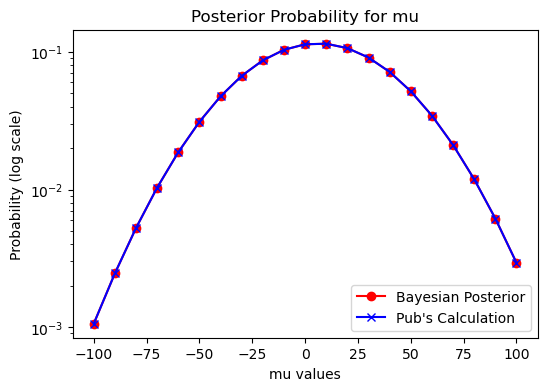

In [4]:
# Provided example of observations 
x          = np.array([ 11.50, -2.32, 9.18]) # n=3 observations
true_sigma = 60.                             # Student also tells you this in beginner's game
true_mu    = -20.                            # the unknown column position, mu

# Extract Possible values of mu (the 21 columns)
mu_values = np.arange(-100, 105, 10)  # from -100 to 100, step 10

# Calculate the posterior distribution
posterior = calc_posterior(mu_values, x, true_sigma)

# Calculate the pub's probability distribution
pub_prob = pub_calc(mu_values, x, true_sigma)

# Plotting on semilog scale, using the semilogy plot 
fig1 = plt.figure(figsize=(6, 4))
ax1 = fig1.subplots()
ax1.semilogy(mu_values, posterior, label="Bayesian Posterior", marker='o', color='red')
ax1.semilogy(mu_values, pub_prob, label="Pub's Calculation", marker='x', color='blue')
ax1.set_xlabel('mu values')
ax1.set_ylabel('Probability (log scale)')
ax1.set_title('Posterior Probability for mu')
ax1.legend(loc='best')
plt.show()

# **2. The advanced game**

## **a) Funtion that calculates the posterior probability $P(\mu,\sigma|{x}_{1}...{x}_{n})$ for each of the 420 (20x21) possible values of $\sigma, \mu$ on Student's grid**

In [5]:
def calc_full_posterior(mu_list, sigma_list, x_obs):
    """
    This function calculates the full posterior distribution for unknown mu and sigma.

    Input: <mu_list> (list): List of ints corresponding to the 21 mu values on the dart board
    Input: <sigma_list> (list): List of ints corresponding to the 20 sigma values on the dart board
    Input: <x_obs> (list): List of n observations x1...xn (i.e where each tea bag was dropped)
    
    Output: <posterior> (numpy array): 2D numpy array (20x21), which holds posterior probabilities for each of the 420 possible values of sigma and mu
    """

    n = len(x_obs)  # Extract number of observations
    posterior = np.zeros((len(sigma_list), len(mu_list)))  # Initialize 2D numpy array to hold posterior probabilities for each of 20 sigma values x 21 mu values

    # Loop over all combinations of mu and sigma and calculate the likelihoods (product of Gaussian densities for each observation) 
    for i, sigma in enumerate(sigma_list):
        for j, mu in enumerate(mu_list):
            # Calculate the likelihood for each combination of mu and sigma
            likelihood = ((2*np.pi*sigma**2)**(-n/2)) * (np.exp(-np.sum(((x_obs-mu)**2)/(2*sigma**2)))) # Likelihood calculation from Gaussian
            posterior[i, j] = likelihood  # Store likelihood in matrix
    
    # Normalize the posterior
    posterior /= np.sum(posterior)
    
    return posterior  # Return the full posterior distribution (2D numpy array)


### *Explanation* 
The function `calc_full_posterior(mu_list, sigma_list, x_obs)` calculates the full posterior probability $P(\mu,\sigma|{x}_{1}...{x}_{n})$ for each of the 420 (20x21) possible values of $\sigma, \mu$ on Student's grid. Mathematically and conceptually, `calc_full_posterior(mu_list, sigma_list, x_obs)` is similar to `calc_posterior(mu_list, x_obs, sigma)`in that it calculates posterior probabilities from the product of Gaussian densities for each observation, the difference is that `calc_posterior(mu_list, x_obs, sigma)` had a fixed $\sigma$ value while for `calc_full_posterior(mu_list, sigma_list, x_obs)` we are obtaining posterior probabilities by calculating and normalizing likelihoods over all possible $\mu,\sigma$ values 

## **b) Function that calculates pub's probability distribution for $\mu$ values in the advanced game**

In [6]:
def pub_calc_adv(mu_list, x_obs):
    """
    This function calculates the pub's distribution for mu values in the advanded game (sigma unknown).  
    This function takes a list of mu values and n observations x1...xn as input; 
    then calculates the probability distribution based on the pub's method for each of the 21 possible values of mu on that grid row as an output.

    Input: <mu_list> (list): List of ints corresponding to the 21 mu values on the dart board
    Input: <x_obs> (list): List of n observations x1...xn (i.e where each tea bag was dropped)

    Output: <pub_pdf> (numpy array): 1D numpy array of length 21, which holds probability distribution for each of the 21 possible values of mu based on the pub's method
    """

    n = len(x_obs) # Extract number of observations
    x_mean = np.mean(x_obs) # Calculate the sample mean from observations
    x_std = np.std(x_obs, ddof=1)  # Calculate the sample standard deviation (n-1 for unbiased estimate)

    # Calculate the standard error of mean using sample standard deviation
    # The pub's approach assumes this for their distribution
    std_error_mean = x_std/np.sqrt(n)

    # Calculate pub's probability distribution 
    # using Gaussian with sample mean
    pub_pdf = np.exp(-0.5 * ((mu_values - x_mean) / std_error_mean) ** 2)

    # Normalize pub's probability distribution
    pub_pdf = pub_pdf / np.sum(pub_pdf)
    
    return pub_pdf  # Return normalized pub's distribution

### *Explanation*
The function `pub_calc_adv(mu_list, x_obs)` calculates the pub's distribution for $\mu$ values in the advanded game ($\sigma$ unknown). `pub_calc_adv(mu_list, x_obs)` is similar to `pub_calc(mu_list, x_obs, sigma)` in that it implements the pub’s method using the sample mean and the standard error of the mean for calculating the probability distribution of $\mu$ values, however because $\sigma$ is unknown, an unbiased sample standard deviation needs to used in its place. Therefore, we now have sample mean $\bar{x} = \frac{1}{n} \sum_{i=1}^{n}{{x}_{i}}$, unbiased sample standard deviation $s = \sqrt{\frac{\sum_{i=1}^{n}{{(\bar{x}-{x}_{i})}^{2}}}{n-1}}$, and the standard error of the mean $\frac{s}{\sqrt{n}}$.

## **c) Plotting**

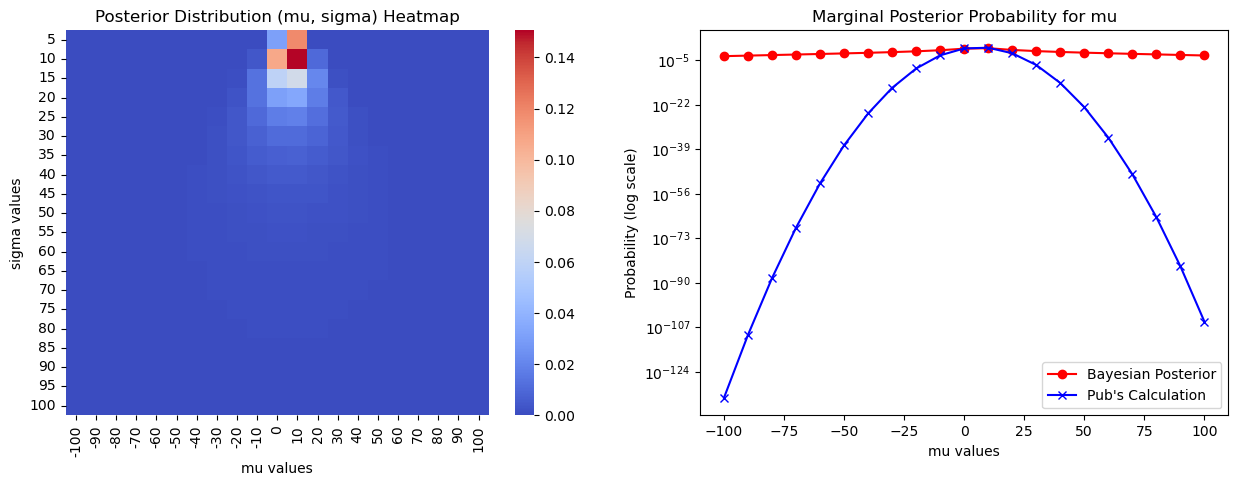

In [7]:
# Provided example of observations 
x          = np.array([ 11.50, -2.32, 9.18]) # n=3 observations
true_sigma = 60.                             # Student also tells you this in beginner's game
true_mu    = -20.                            # the unknown column position, mu

# Extract Possible values of mu (the 21 columns)
mu_values = np.arange(-100, 105, 10)  # from -100 to 100, step 10
# Extract Possible values of sigma (the 20 rows)
sigma_values = np.arange(5, 105, 5)  # Sigma values from 5 to 100 in steps of 5

# Calculate the full posterior distribution for all mu and sigma values
full_posterior = calc_full_posterior(mu_values, sigma_values, x)

# Plot the posterior distribution as a heatmap using seaborn
fig2 = plt.figure(figsize=(15, 5))
(ax2, ax3) = fig2.subplots(1,2)
sns.heatmap(full_posterior, ax=ax2, xticklabels=mu_values, yticklabels=sigma_values, cmap='coolwarm', cbar=True)
ax2.set_xlabel('mu values')
ax2.set_ylabel('sigma values')
ax2.set_title('Posterior Distribution (mu, sigma) Heatmap')

# Marginalize over sigma to get the marginal distribution for mu
marginal_posterior = np.sum(full_posterior, axis=0)

# Calculate the pub's distribution for mu (with unknown sigma)
pub_calc = pub_calc_adv(mu_values, x)

# Plotting distributions of mu on semilog scale, using the semilogy plot 
ax3.semilogy(mu_values, marginal_posterior, label="Bayesian Posterior", marker='o', color='red')
ax3.semilogy(mu_values, pub_calc, label="Pub's Calculation", marker='x', color='blue')
ax3.set_xlabel('mu values')
ax3.set_ylabel('Probability (log scale)')
ax3.set_title('Marginal Posterior Probability for mu')
ax3.legend(loc='best')

plt.show()

# **3. Where's the advantage?**

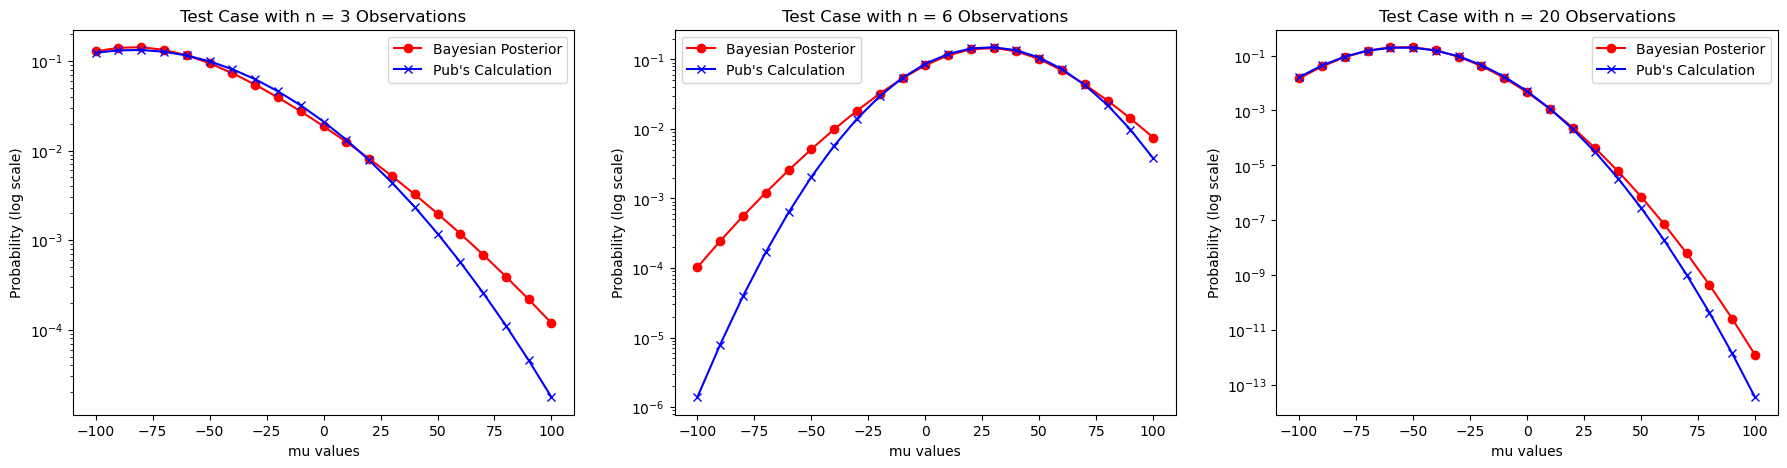

In [8]:
# Run a couple more test cases
test1 = np.array([2.88, -135.08, -117.57]) # n=3 observations
test2 = np.array([23.56, 85.49, -36.55, -15.26, -16.79, 126.95]) # n=6 observations
test3 = np.array([-32.25, 82.92, -188.27, -32.63, -221.78, 30.90, -161.79, 32.82, -22.49, -11.88, 56.76, -93.69, -117.25, -39.13, -79.68, 45.52, -160.80, -4.54, -2.43, -176.00]) # n=20 observations

# Calculate the full posterior distribution for all mu and sigma values
full_posterior1 = calc_full_posterior(mu_values, sigma_values, test1)
full_posterior2 = calc_full_posterior(mu_values, sigma_values, test2)
full_posterior3 = calc_full_posterior(mu_values, sigma_values, test3)

# Marginalize over sigma to get the marginal distribution for mu
marginal_posterior1 = np.sum(full_posterior1, axis=0)
marginal_posterior2 = np.sum(full_posterior2, axis=0)
marginal_posterior3 = np.sum(full_posterior3, axis=0)

# Calculate the pub's distribution for mu (with unknown sigma)
pub_calc1 = pub_calc_adv(mu_values, test1)
pub_calc2 = pub_calc_adv(mu_values, test2)
pub_calc3 = pub_calc_adv(mu_values, test3)

fig2 = plt.figure(figsize=(22, 5))
(ax4, ax5, ax6) = fig2.subplots(1,3)

# Plotting distributions of mu on semilog scale, using the semilogy plot 
ax4.semilogy(mu_values, marginal_posterior1, label="Bayesian Posterior", marker='o', color='red')
ax4.semilogy(mu_values, pub_calc1, label="Pub's Calculation", marker='x', color='blue')
ax4.set_xlabel('mu values')
ax4.set_ylabel('Probability (log scale)')
ax4.set_title('Test Case with n = 3 Observations')
ax4.legend(loc='best')

ax5.semilogy(mu_values, marginal_posterior2, label="Bayesian Posterior", marker='o', color='red')
ax5.semilogy(mu_values, pub_calc2, label="Pub's Calculation", marker='x', color='blue')
ax5.set_xlabel('mu values')
ax5.set_ylabel('Probability (log scale)')
ax5.set_title('Test Case with n = 6 Observations')
ax5.legend(loc='best')

ax6.semilogy(mu_values, marginal_posterior3, label="Bayesian Posterior", marker='o', color='red')
ax6.semilogy(mu_values, pub_calc3, label="Pub's Calculation", marker='x', color='blue')
ax6.set_xlabel('mu values')
ax6.set_ylabel('Probability (log scale)')
ax6.set_title('Test Case with n = 20 Observations')
ax6.legend(loc='best')

plt.show()


### *Explanation*
The main difference between the pub's odds calculation and the Bayesian approach is how the uncertainty for the unkown parameter $\sigma$ is handled. The pub calculates its odds by estimating the sample mean $\bar{x}$ from the observations, using the sample standard deviation $s$ as a "true" stand-in for $\sigma$, and assuming $\mu$ is a normal distribution centered on $\bar{x}$ with standard deviation $\frac{s}{\sqrt{n}}$. The problem begins to show itself when $n$ (number of observations) is small, because $s$ becomes a poor estimate for the true $\sigma$, and this introduces added uncertainty which is unaccounted by the pub. On the other hand, the Bayesian approach takes into account this uncertainty by considering all possible values of both $\mu$ and $\sigma$, and instead of using a single estimate $s$, it marginalizes over all possible values of $\sigma$, which gives a more accurate distribution for $\mu$. This means that when $n$ is small, the pub is overconfident in it estimate of $\mu$ which leads to **an underestimate of the tails** (the pub thinks $\mu$ is more tightly constrained around $\bar{x}$ than it acutally is) and **overestimate of the central values** (the pub assumes the standard error of mean to be more precise than it actually is). This is visually seen in the graphs because the Bayesian approach has a distribution of $\mu$ that is less peaked with larger tails as compared to the distribution of $\mu$ with the pub's approach. **<mark> Therefore, the advantage lies with betting on the values of $\mu$ that the pub undervalues, which would be to bet on values of $\mu$ in the tail regions of the distribution. This is most true when $n$ is small, so bet early. </mark>**

In [9]:
import watermark

%load_ext watermark
%watermark -v -m -p numpy,matplotlib,seaborn,pandas,jupyterlab

Python implementation: CPython
Python version       : 3.12.5
IPython version      : 8.27.0

numpy     : 2.1.1
matplotlib: 3.9.2
seaborn   : 0.13.2
pandas    : 2.2.2
jupyterlab: 4.2.5

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

